In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('events.csv')

In [5]:
df.iloc[0]

data    {"event": "user", "timestamp": 1629034566.4657...
Name: 0, dtype: object

In [6]:
df.iloc[0]['data']

'{"event": "user", "timestamp": 1629034566.465764, "text": "Can you give me dosage information of Acetaminophen?", "parse_data": {"intent": {"id": 7090382799137562595, "name": "dosage_drug", "confidence": 0.9982604384422302}, "entities": [{"entity": "lab", "start": 38, "end": 51, "confidence_entity": 0.917961061000824, "value": "Acetaminophen", "extractor": "DIETClassifier"}, {"entity": "drug", "start": 38, "end": 51, "value": "Acetaminophen", "extractor": "RegexEntityExtractor"}], "text": "Can you give me dosage information of Acetaminophen?", "message_id": "7d8959488b874f40ace7448c16a0e949", "metadata": {}, "intent_ranking": [{"id": 7090382799137562595, "name": "dosage_drug", "confidence": 0.9982604384422302}, {"id": 405427049427078584, "name": "during_lab", "confidence": 0.0006751163164153695}, {"id": -9083428087091897059, "name": "need_lab", "confidence": 0.00023692214745096862}, {"id": -6156321711181753568, "name": "warnings_drug", "confidence": 0.00020338113245088607}, {"id": 321

In [7]:
import json

In [8]:
json_acceptable_string = df.iloc[0]['data'].replace("'", "\"")

In [9]:
dictionary = json.loads(json_acceptable_string)

In [10]:
dictionary.keys()

dict_keys(['event', 'timestamp', 'text', 'parse_data', 'input_channel', 'message_id', 'metadata'])

In [11]:
dictionary['event']

'user'

In [12]:
dictionary['timestamp']

1629034566.465764

In [13]:
dictionary['text']

'Can you give me dosage information of Acetaminophen?'

In [14]:
dictionary['input_channel']

'rest'

In [15]:
dictionary['parse_data'].keys()

dict_keys(['intent', 'entities', 'text', 'message_id', 'metadata', 'intent_ranking', 'response_selector'])

In [16]:
dictionary['parse_data']['intent']

{'id': 7090382799137562595,
 'name': 'dosage_drug',
 'confidence': 0.9982604384422302}

In [17]:
dictionary['parse_data']['intent_ranking']

[{'id': 7090382799137562595,
  'name': 'dosage_drug',
  'confidence': 0.9982604384422302},
 {'id': 405427049427078584,
  'name': 'during_lab',
  'confidence': 0.0006751163164153695},
 {'id': -9083428087091897059,
  'name': 'need_lab',
  'confidence': 0.00023692214745096862},
 {'id': -6156321711181753568,
  'name': 'warnings_drug',
  'confidence': 0.00020338113245088607},
 {'id': 3219210177683846726,
  'name': 'any_detail_lab',
  'confidence': 0.00019598257495090365},
 {'id': -642408458165806388,
  'name': 'inform_lab',
  'confidence': 9.751486504683271e-05},
 {'id': -8698956650135219269,
  'name': 'detail_lab',
  'confidence': 9.193476580549031e-05},
 {'id': -7717581020534048741,
  'name': 'usage_lab',
  'confidence': 8.928767056204379e-05},
 {'id': 606063139889531774,
  'name': 'prepare_lab',
  'confidence': 7.776697748340666e-05},
 {'id': -2526813778595393808,
  'name': 'risk_lab',
  'confidence': 7.16398426447995e-05}]

In [18]:
dictionary['parse_data']['intent_ranking'][0]['confidence']

0.9982604384422302

In [19]:
confidences = [intent['confidence'] for intent in dictionary['parse_data']['intent_ranking']]

In [20]:
import matplotlib.pyplot as plt

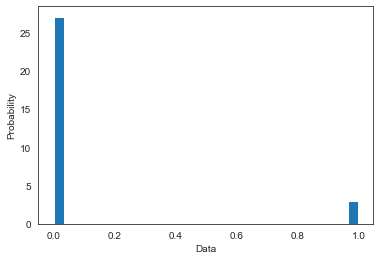

In [21]:
plt.hist(confidences, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data');

In [22]:
plt.show()

In [23]:
le = len(df)
le

101

In [24]:
all_confidence = []

for i in range(le):
    json_acceptable_string = df.iloc[i]['data'].replace("'", "\"")
    dictionary = json.loads(json_acceptable_string)
    confidences = [intent['confidence'] for intent in dictionary['parse_data']['intent_ranking']]
    all_confidence.append(confidences)

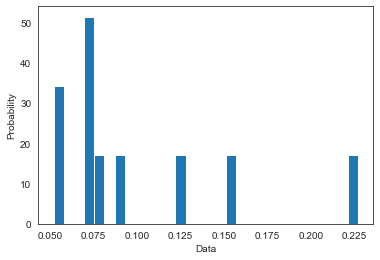

In [25]:
plt.hist(confidences, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

In [26]:
import mysql.connector

In [27]:
from getpass import getpass

In [30]:
password = getpass()

In [31]:
db = mysql.connector.connect(
            host='localhost',
            user='root',
            password=password,
            database='rasa')

In [32]:
cursor = db.cursor()

In [33]:
cursor.execute("SELECT intent_name, data FROM events WHERE type_name = 'user'")

In [34]:
events = [item for item in list(cursor)]

In [35]:
intents = [event[0] for event in events]

In [36]:
datas = [event[1] for event in events]

In [37]:
all_confidence = []

for i in range(le):
    json_acceptable_string = datas[i].replace("'", "\"")
    dictionary = json.loads(json_acceptable_string)
    all_confidence.append(dictionary['parse_data']['intent']['confidence'])

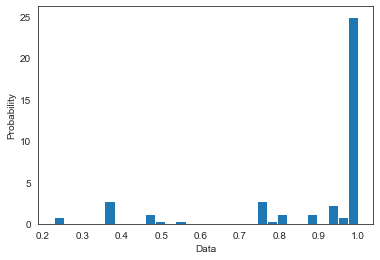

In [38]:
plt.hist(all_confidence, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

In [39]:
dictionary['parse_data']['entities'][0]['confidence_entity']

0.9952464699745178

In [40]:
dictionary['parse_data']['intent']['confidence']

0.22688619792461395

In [41]:
dictionary['parse_data']['entities']

[{'entity': 'lab',
  'start': 0,
  'end': 2,
  'confidence_entity': 0.9952464699745178,
  'value': 'haptoglobin',
  'extractor': 'DIETClassifier',
  'processors': ['EntitySynonymMapper']}]

In [42]:
entity_confidences = []

for i in range(le):
    json_acceptable_string = datas[i].replace("'", "\"")
    dictionary = json.loads(json_acceptable_string)

    for entity in dictionary['parse_data']['entities']:
        if len(entity) != 0 and 'confidence_entity' in entity.keys():
            entity_confidences.append(entity['confidence_entity'])

In [43]:
dictionary['parse_data']['entities']

[{'entity': 'lab',
  'start': 0,
  'end': 2,
  'confidence_entity': 0.9952464699745178,
  'value': 'haptoglobin',
  'extractor': 'DIETClassifier',
  'processors': ['EntitySynonymMapper']}]

In [44]:
entity

{'entity': 'lab',
 'start': 0,
 'end': 2,
 'confidence_entity': 0.9952464699745178,
 'value': 'haptoglobin',
 'extractor': 'DIETClassifier',
 'processors': ['EntitySynonymMapper']}

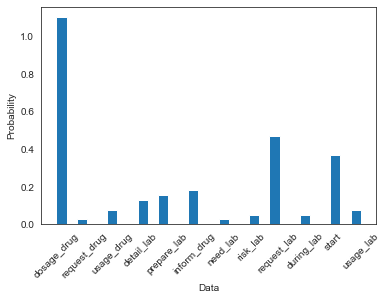

In [45]:
plt.hist(intents, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data')
plt.xticks(rotation = 45)
plt.show()

In [46]:
dictionary['timestamp']

1629101236.6568117

In [47]:
timestamps = []

for i in range(le):
    json_acceptable_string = datas[i].replace("'", "\"")
    dictionary = json.loads(json_acceptable_string)
    timestamps.append(dictionary['timestamp'])

In [48]:
import seaborn as sns
sns.set_style("white")

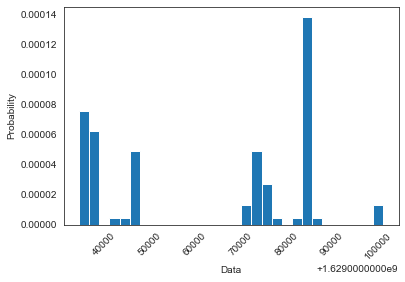

In [49]:
plt.hist(timestamps, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data')
plt.xticks(rotation = 45)
plt.show()

/opt/anaconda3/envs/streamlit/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

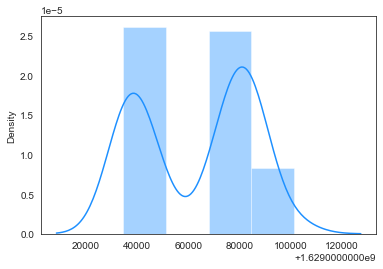

In [54]:
sns.distplot(timestamps, color="dodgerblue", label="Compact")

<AxesSubplot:ylabel='Density'>

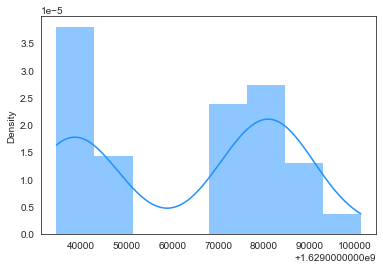

In [68]:
sns.histplot(timestamps, color="dodgerblue", kde=True, stat="density", linewidth=0)

In [59]:
timestamps[0]

1629034566.465764

In [60]:
from datetime import datetime

In [64]:
s = datetime.fromtimestamp(timestamps[0])

<AxesSubplot:ylabel='Density'>

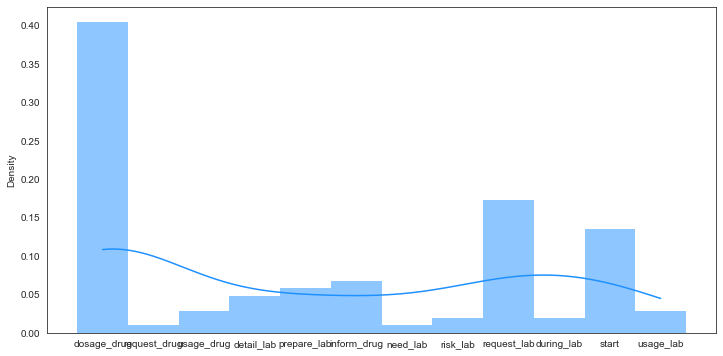

In [82]:
fig, ax = plt.subplots(figsize = (12,6))    
sns.histplot(intents, color="dodgerblue", kde=True, stat="density", linewidth=0)

In [ ]:

x_dates = timestamps.dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [106]:
s = datetime.fromtimestamp(timestamps[10]).strftime('%Y-%m-%d')
s

'2021-08-15'

IndexError: string index out of range